Number of classes: 49
X_train shape: (185892, 28, 28, 1)
y_train shape: (185892, 49)
X_val shape: (46473, 28, 28, 1)
y_val shape: (46473, 49)
test_images shape: (38547, 28, 28, 1)
test_labels shape: (38547, 49)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 49)                  │           6,321 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 230,065 (898.69 KB)

 Trainable params: 230,065 (898.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
5810/5810 ━━━━━━━━━━━━━━━━━━━━ 204s 35ms/step - accuracy: 0.7669 - loss: 0.9036 - val_accuracy: 0.9275 - val_loss: 0.2661
Epoch 2/10
5810/5810 ━━━━━━━━━━━━━━━━━━━━ 194s 33ms/step - accuracy: 0.9376 - loss: 0.2234 - val_accuracy: 0.9411 - val_loss: 0.2114
Epoch 3/10
5810/5810 ━━━━━━━━━━━━━━━━━━━━ 201s 33ms/step - accuracy: 0.9586 - loss: 0.1474 - val_accuracy: 0.9471 - val_loss: 0.1920
Epoch 4/10
5810/5810 ━━━━━━━━━━━━━━━━━━━━ 196s 34ms/step - accuracy: 0.9684 - loss: 0.1101 - val_accuracy: 0.9509 - val_loss: 0.1857
Epoch 5/10
5810/5810 ━━━━━━━━━━━━━━━━━━━━ 198s 33ms/step - accuracy: 0.9744 - loss: 0.0857 - val_accuracy: 0.9494 - val_loss: 0.1997
Epoch 6/10
5810/5810 ━━━━━━━━━━━━━━━━━━━━ 203s 33ms/step - accuracy: 0.9790 - loss: 0.0687 - val_accuracy: 0.9507 - val_loss: 0.2048
Epoch 7/10
5810/5810 ━━━━━━━━━━━━━━━━━━━━ 204s 34ms/step - accuracy: 0.9824 - loss: 0.0555 - val_accuracy: 0.9501 - val_loss: 0.2163
Epoch 8/10
5810/5810 ━━━━━━━━━━━━━━━━━━━━ 199s 33ms/step - accuracy: 

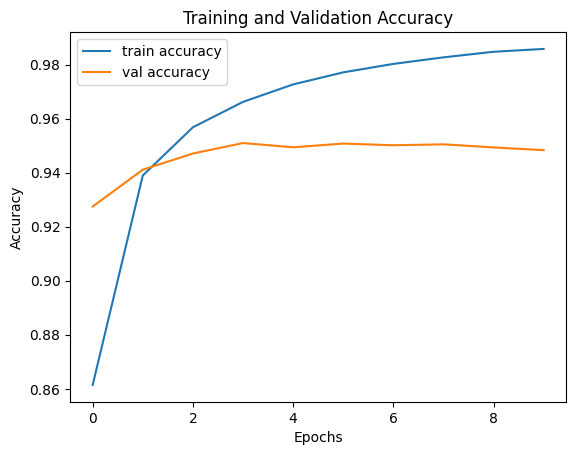

1205/1205 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step


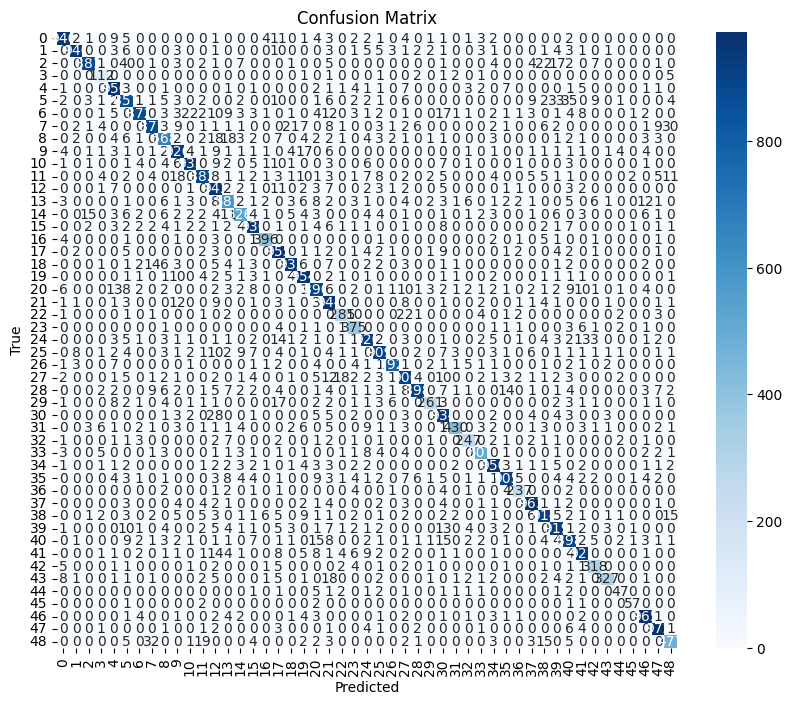

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Step 1: Load the Kuzushiji dataset
# Ensure that you have extracted the dataset and update the paths accordingly
train_images = np.load('/content/k49-train-imgs.npz')['arr_0']
train_labels = np.load('/content/k49-train-labels.npz')['arr_0']
test_images = np.load('/content/k49-test-imgs.npz')['arr_0']
test_labels = np.load('/content/k49-test-labels.npz')['arr_0']

# Normalize the images to values between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape the images to 28x28 pixels with 1 channel for grayscale
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Check the number of unique labels to ensure correct number of classes
num_classes = len(np.unique(train_labels))  # Should be 10 for Kuzushiji-MNIST, or 49 for Kuzushiji-49
print(f"Number of classes: {num_classes}")

# Convert labels to one-hot encoding for training and test sets
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Split the training data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Print data shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"test_images shape: {test_images.shape}")
print(f"test_labels shape: {test_labels.shape}")

# Step 2: Build the CNN Model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer should match the number of classes
])

# Step 3: Compile the Model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Step 4: Train the Model

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Step 5: Evaluate the Model on the Test Set

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Step 6: Plot Training and Validation Accuracy

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 7: Confusion Matrix

y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
